# Linear regression

In [69]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import ceil, floor

## Functions

### Data normalization

In [70]:
def featureNormalize(X):
    """Return the matrix X with the normalize data, along with the mean and the standard deviation"""
    X_norm = X
    mu = 0
    sigma = 1
    # Write here your normalization function
    return X_norm, mu, sigma

### Cost function

In [71]:
def computeCost(X,y, theta):
    """Computes the cost function J"""
    m = len(X)
    J = 0
    # Write here your cost function
    return J

### Gradient descent

In [72]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """Computes gradient descent and returns the calculated parameters and the history of the cost function"""
    m = len(X)
    J_history = np.zeros((num_iters,1))
    for i in range(0,num_iters):
        # Write here your gradient descent function
        J_history[i] = computeCost(X,y,theta)
    return theta,J_history

### Normal Equation

In [73]:
def normalEqn(X,Y):
    """Calculates the prediction parameters analytically"""
    Xt = X.transpose()
    Xinv = np.linalg.pinv(Xt.dot(X))
    return np.linalg.multi_dot([Xinv,Xt,Y])

### Predictor function

In [74]:
def predict(x,theta):
    """Predicts a value from an array of features and an array of predicted parameters"""
    return float(x.dot(theta))

## Execution

### Load data from files

In [75]:
data1 = np.loadtxt('ex1data1.txt', delimiter=',')
data2 = np.loadtxt('ex1data2.txt', delimiter=',')

In [76]:
X1 = data1[:,0].reshape(-1,1)
y1 = data1[:,1].reshape(-1,1)

X2 = data2[:,:2]
X2n, mu, sigma = featureNormalize(X2)
y2 = data2[:,2].reshape(-1,1)

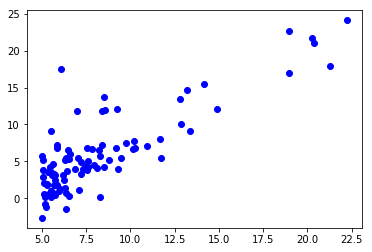

In [77]:
plt.plot(X1, y1, 'bo')

In [78]:
theta = np.zeros((2,1))
Xi1 = np.insert(X1,0,1,axis=1)
print("Cost function result: " + str(computeCost(Xi1, y1, theta)))

Cost function result: 0


### Gradient descent with 1 variable

In [79]:
theta1 = np.zeros((2,1))

iter1 = 1500
alpha = 0.01

Xi1 = np.insert(X1,0,1,axis=1)
theta1,J_history = gradientDescent(Xi1,y1,theta1,alpha,iter1)

theta1

array([[0.],
       [0.]])

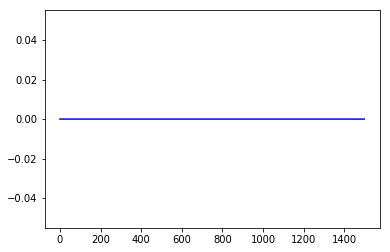

In [80]:
plt.plot(J_history, 'b')

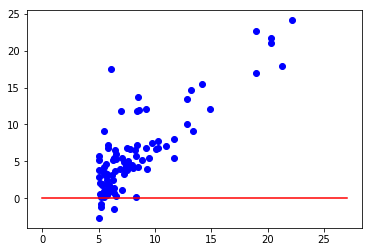

In [81]:
plt.plot(X1, y1, 'bo')
x_plot = range(ceil(np.max(X1))+5)
y_plot = x_plot * theta1[1] + theta1[0]
plt.plot(x_plot, y_plot, 'r')

### Multiple variables

We normalize the data before launching gradient descent

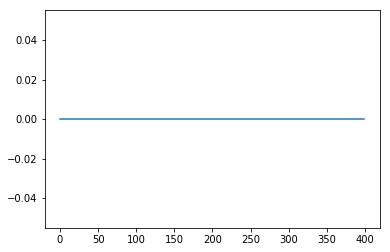

In [82]:
theta2 = np.zeros((3,1))
alpha2 = 0.1
iter2 = 400
Xi2 = np.insert(X2n,0,1,axis=1)
theta2,J_history2 = gradientDescent(Xi2,y2,theta2,alpha2,iter2)
plt.plot(J_history2)

Ecuación normal

In [83]:
theta3 = normalEqn(np.insert(X2, 0, 1, axis=1),y2)
print(theta3)
print(theta2)

[[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]
[[0.]
 [0.]
 [0.]]


### Predicción de valores

In [84]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = predict(np.array([1, 3.5]),theta1)
print('For population = 35,000, we predict a profit of ' + str(predict1*10000))
predict2 = predict(np.array([1, 7.0]),theta1);
print('For population = 70,000, we predict a profit of ' + str(predict2*10000))

For population = 35,000, we predict a profit of 0.0
For population = 70,000, we predict a profit of 0.0


In [85]:
x = (np.array([1650, 3]) - mu) / sigma
predict3 = predict(np.insert(x,0,1), theta2)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ' + str(predict3))
predict4 = predict(np.array([1, 1650, 3]), theta3)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equation): ' + str(predict4))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 0.0
Predicted price of a 1650 sq-ft, 3 br house (using normal equation): 293081.4643349715
